In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('covid-19.csv')

df.date = pd.to_datetime(df.date, format="%d-%m-%Y")

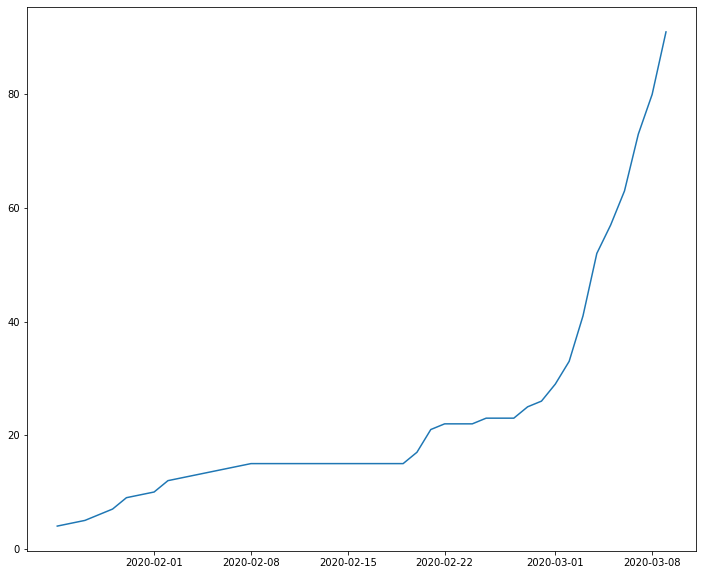

In [17]:
fig = plt.figure(figsize=(12,10))

plt.plot(df.date, df.confirmed)

[-24.74193554  17.00020835  28.74193554]


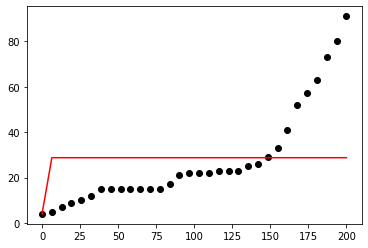

In [6]:
from scipy.optimize import curve_fit



x = np.linspace(0,200,df.shape[0])
yn = df.confirmed.values
popt, pcov = curve_fit(func, x, yn, method='dogbox')#, bounds=(0, [1., 0.1, 0.9]))

print(popt)
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")

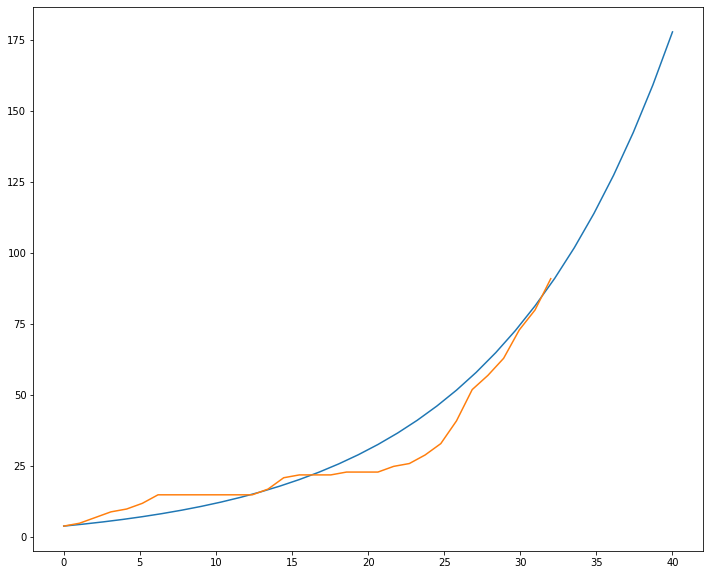

In [36]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

fig = plt.figure(figsize=(12,10))
x = np.linspace(0, 40,df.shape[0])
xx = np.linspace(0, 32, df.shape[0])
plt.plot(x, func(x, 6, -0.085, -2))
plt.plot(xx, yn)

<BarContainer object of 32 artists>

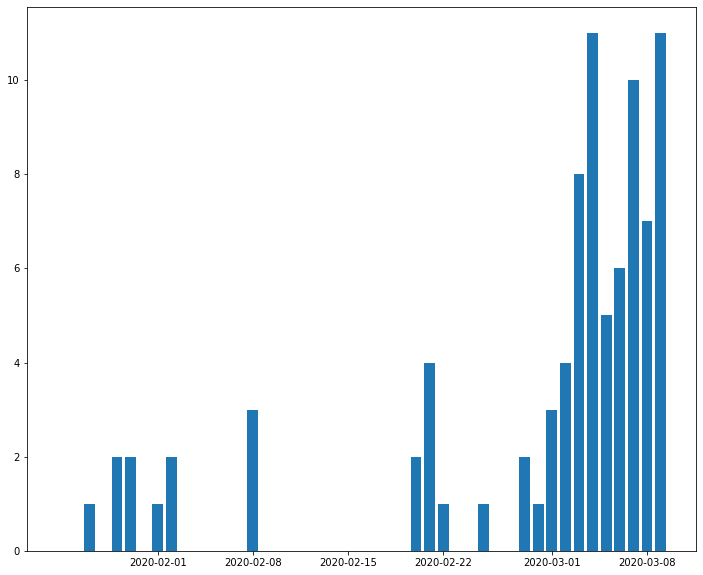

In [31]:
fig = plt.figure(figsize=(12,10))

difference = np.insert(np.diff(df.confirmed),0,0)

plt.bar(df.date, difference)